In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import sklearn.tree as tree
import sklearn.ensemble as ensemble
import sklearn.model_selection as model_selection

style.use('bmh')

In [239]:
#learning_rate=0.05, max_depth=2, min_samples_leaf=1, n_estimators=500, random_state=0
def gradboostregmodel(X, y, lr,md,msl,ne,rs, X_predicter):
    X_train = X.head(round(0.8*len(X)))
    X_test = X.tail(round(0.2*len(X)))
    y_train = y.head(round(0.8*len(y)))
    y_test = y.tail(round(0.2*len(y)))
    
    regressor = ensemble.GradientBoostingRegressor(learning_rate=lr, max_depth=md, min_samples_leaf=msl, n_estimators=ne, random_state=rs)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print(y_pred) 

    y_all = np.concatenate((y_train, y_test))
    y_pred_all = np.concatenate((regressor.predict(X_train), y_pred))

    plt.figure(figsize=(30, 16))
    plt.plot(y_all, label='Actual')
    plt.plot(y_pred_all, label='Predicted')
    plt.legend()
    plt.show()
    result = regressor.predict(X_predicter)

    return result

In [164]:
energyclean = pd.read_json('total-final-energy.json')
energyclean = energyclean.result
energyclean = pd.DataFrame(energyclean[0]['records'])
energyclean = energyclean.drop(columns = ['_id'])

energyclean.to_csv('undirtied_total-final-energy.csv', index = False)

In [165]:

#file is dirtied, original file at https://data.gov.sg/dataset/total-final-energy-consumption-2018
energy = pd.read_csv('total-final-energy-consumption-2009-to-2019.csv')

overview = energy.head(10)
overview

year                         sector     energy_products  consumption_ktoe
0   2009  Commerce and Services-related      Coal and Peat0               NaN
1   2009  Commerce and Services-related           Crude Oil               NaN
2   2009  Commerce and Services-related         Electricity            1272.6
3  20009  Commerce and Services-related         Natural Gas              72.9
4   2009  Commerce and Services-related              Others               0.0
5   2009  Commerce and Services-related  Petroleum Products              78.5
6   2009                     Households       Coal and Peat               0.0
7   2009                     Households       Coal and Peat               0.0
8   2009                     Households           Crude Oil               NaN
9   2009                     Households         Electricity             552.9

In [166]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              333 non-null    int64  
 1   sector            333 non-null    object 
 2   energy_products   333 non-null    object 
 3   consumption_ktoe  329 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.5+ KB


In [167]:
# replacing mistyped values

# for i in ['year', 'sector', 'energy_products']:
#     print(pd.unique(energy[i]))
    
mistypedyears = [20009,20100,20011,20013,20017,22019]
correctyears = [2009,2010,2011,2013,2017,2019]

energy['year'] = energy['year'].replace(mistypedyears, correctyears)  

energy['energy_products'] = energy['energy_products'].replace('Coal and Peat0', 'Coal and Peat')

print('Fixed dataset with no mistyped values:')
print(energy)

Fixed dataset with no mistyped values:
     year                         sector     energy_products  consumption_ktoe
0    2009  Commerce and Services-related       Coal and Peat               NaN
1    2009  Commerce and Services-related           Crude Oil               NaN
2    2009  Commerce and Services-related         Electricity            1272.6
3    2009  Commerce and Services-related         Natural Gas              72.9
4    2009  Commerce and Services-related              Others               0.0
..    ...                            ...                 ...               ...
328  2019              Transport-related           Crude Oil               0.0
329  2019              Transport-related         Electricity             259.8
330  2019              Transport-related         Natural Gas               2.7
331  2019              Transport-related              Others               NaN
332  2019              Transport-related  Petroleum Products            2320.1

[333 rows x 

In [168]:
#fix NaN energy values

#to find and fix missing values
# print('finding null values:')
# print(pd.isnull(energy))


#replace missing values with mean of the energy products
energyproducts= pd.DataFrame({"energy":(energy).groupby('energy_products')['consumption_ktoe'].mean()})#find mean
#print('energyproducts')

print(energyproducts)
for i in ['Coal and Peat','Crude Oil','Electricity','Natural Gas','Others','Petroleum Products']: #replace
    energy[energy['energy_products'] == i] = energy[energy['energy_products'] == i].fillna(round(energyproducts['energy'][i],2))


                         energy
energy_products                
Coal and Peat         29.498182
Crude Oil              0.000000
Electricity          793.494545
Natural Gas          252.896429
Others                 0.000000
Petroleum Products  1703.305455


In [169]:
#replacing duplicated rows
print(energy.head(10).duplicated())

energy = energy.drop_duplicates()

(energy.head(10)).duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
dtype: bool


0     False
1     False
2     False
3     False
4     False
5     False
6     False
8     False
9     False
10    False
dtype: bool

In [170]:
#write to new csv file
energy.to_csv('cleansed_energy.csv', index=False)
energy.head(10)

year                         sector     energy_products  consumption_ktoe
0   2009  Commerce and Services-related       Coal and Peat              29.5
1   2009  Commerce and Services-related           Crude Oil               0.0
2   2009  Commerce and Services-related         Electricity            1272.6
3   2009  Commerce and Services-related         Natural Gas              72.9
4   2009  Commerce and Services-related              Others               0.0
5   2009  Commerce and Services-related  Petroleum Products              78.5
6   2009                     Households       Coal and Peat               0.0
8   2009                     Households           Crude Oil               0.0
9   2009                     Households         Electricity             552.9
10  2009                     Households         Natural Gas              54.0

C:\Users\cairu\AppData\Local\Temp\ipykernel_3416\2960679182.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[p, s] = (((cleanedenergy[cleanedenergy['energy_products'] == p])[cleanedenergy['sector'] == s]['consumption_ktoe']).sum())


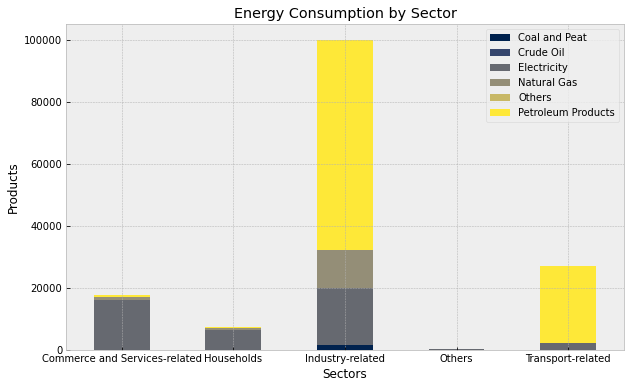

In [171]:
#data visualization using cleaned energy dataset
cleanedenergy = pd.read_csv('cleansed_energy.csv')
sectors = cleanedenergy['sector'].unique()
products = ['Coal and Peat','Crude Oil','Electricity','Natural Gas','Others','Petroleum Products']

#col sector , row product
df = np.random.randn(6, len(sectors))
df = pd.DataFrame(df, index=products)
df.columns = ['Commerce and Services-related', 'Households', 'Industry-related', 'Others', 'Transport-related']

#key is product
#get sum of energy products by sector, then stack on bar graph


for s in sectors:
    for p in products:
        df.loc[p, s] = (((cleanedenergy[cleanedenergy['energy_products'] == p])[cleanedenergy['sector'] == s]['consumption_ktoe']).sum())


#bar graph by sector using matplotlib pyplot
fig, ax = plt.subplots()


(df.T).plot(kind='bar',stacked=True, ax=ax, figsize=(10,6), xlabel= 'Sectors', ylabel = 'Products', title = 'Energy Consumption by Sector', legend = True, colormap = 'cividis')
plt.xticks(rotation=0)
plt.xlabel('Sectors', fontsize=12)
plt.savefig('stacked bar.jpg', format='jpg')


In [172]:
cleanedenergy.head(10)

year                         sector     energy_products  consumption_ktoe
0  2009  Commerce and Services-related       Coal and Peat              29.5
1  2009  Commerce and Services-related           Crude Oil               0.0
2  2009  Commerce and Services-related         Electricity            1272.6
3  2009  Commerce and Services-related         Natural Gas              72.9
4  2009  Commerce and Services-related              Others               0.0
5  2009  Commerce and Services-related  Petroleum Products              78.5
6  2009                     Households       Coal and Peat               0.0
7  2009                     Households           Crude Oil               0.0
8  2009                     Households         Electricity             552.9
9  2009                     Households         Natural Gas              54.0

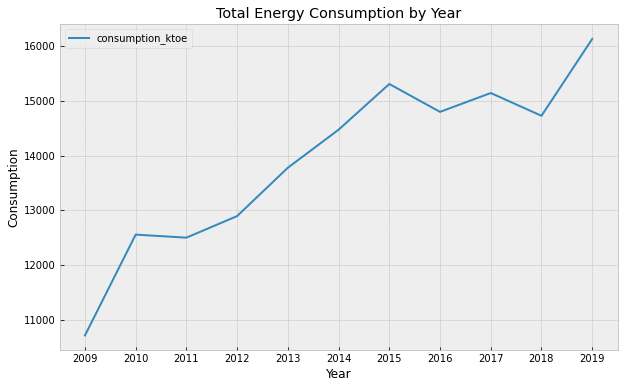

In [173]:
cleanedenergy.groupby('year')['consumption_ktoe'].sum().plot(kind='line', figsize=(10,6), xlabel=  'Year', ylabel = 'Consumption', title = 'Total Energy Consumption by Year', legend = True, xticks = cleanedenergy['year'].unique())
plt.savefig('totalyear.jpg', format='jpg')

In [174]:
building = pd.read_csv('listing-of-building-energy-performance-data-for-commercial-buildings.csv')

building.head(10)
building = building.drop(columns = ['buildingtype','greenmarkstatus','buildingsize','grossfloorarea','voluntarydisclosure'])


In [175]:
building.head(10)

buildingname                           buildingaddress greenmarkrating  \
0          HEXACUBE         160 CHANGI ROAD, SINGAPORE 419728             NaN   
1               NaN                                       NaN             NaN   
2  CITY SQUARE MALL      180 KITCHENER ROAD, SINGAPORE 208539        Platinum   
3    REPUBLIC PLAZA         9 RAFFLES PLACE, SINGAPORE 048619        Platinum   
4      CENTRAL MALL         1 MAGAZINE ROAD, SINGAPORE 059567        Platinum   
5             KINEX  11 TANJONG KATONG ROAD, SINGAPORE 437157            Gold   
6     UNITED SQUARE        101 THOMSON ROAD, SINGAPORE 307591             NaN   
7     TIALOC CENTRE   731 NORTH BRIDGE ROAD, SINGAPORE 198699             NaN   
8         HPL HOUSE        50 CUSCADEN ROAD, SINGAPORE 249724             NaN   
9               NaN      69 KEONG SAIK ROAD, SINGAPORE 089165             NaN   

   greenmarkyearaward  2017energyuseintensity  2018energyuseintensity  
0                 NaN                    81.0                   105.0  
1                 NaN                   475.0                   402.0  
2              2018.0                   382.0                   365.0  
3              2018.0                   212.0                   183.0  
4              2017.0                   203.0                   181.0  
5              2015.0                   431.0                   396.0  
6                 NaN                   281.0                   277.0  
7                 NaN                   197.0                   220.0  
8                 NaN                   278.0                   269.0  
9                 NaN                   234.0                   228.0

In [176]:
building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buildingname            783 non-null    object 
 1   buildingaddress         986 non-null    object 
 2   greenmarkrating         306 non-null    object 
 3   greenmarkyearaward      306 non-null    float64
 4   2017energyuseintensity  1224 non-null   float64
 5   2018energyuseintensity  1224 non-null   float64
dtypes: float64(3), object(3)
memory usage: 58.4+ KB


In [177]:

#replace missing values
#i will only be filling in the missing values for energy use intensity and ratings as the other columns are not important for my analysis
energyuse = {}


#fill missing ratings with 'Not Rated'
building['greenmarkrating'] = building['greenmarkrating'].fillna('Not Rated')
ratings = building['greenmarkrating'].unique()
#calculate mean for energyuse
for i in ('2017energyuseintensity','2018energyuseintensity'):   
    energyuse[i] = pd.DataFrame({"energy":(building).groupby('greenmarkrating')[i].mean()})#find mean
for i in ('2017energyuseintensity','2018energyuseintensity'):
    for o in ratings:
        building[i] = building[i].fillna(energyuse[i]['energy'][o])
building.head(10)

buildingname                           buildingaddress greenmarkrating  \
0          HEXACUBE         160 CHANGI ROAD, SINGAPORE 419728       Not Rated   
1               NaN                                       NaN       Not Rated   
2  CITY SQUARE MALL      180 KITCHENER ROAD, SINGAPORE 208539        Platinum   
3    REPUBLIC PLAZA         9 RAFFLES PLACE, SINGAPORE 048619        Platinum   
4      CENTRAL MALL         1 MAGAZINE ROAD, SINGAPORE 059567        Platinum   
5             KINEX  11 TANJONG KATONG ROAD, SINGAPORE 437157            Gold   
6     UNITED SQUARE        101 THOMSON ROAD, SINGAPORE 307591       Not Rated   
7     TIALOC CENTRE   731 NORTH BRIDGE ROAD, SINGAPORE 198699       Not Rated   
8         HPL HOUSE        50 CUSCADEN ROAD, SINGAPORE 249724       Not Rated   
9               NaN      69 KEONG SAIK ROAD, SINGAPORE 089165       Not Rated   

   greenmarkyearaward  2017energyuseintensity  2018energyuseintensity  
0                 NaN                    81.0                   105.0  
1                 NaN                   475.0                   402.0  
2              2018.0                   382.0                   365.0  
3              2018.0                   212.0                   183.0  
4              2017.0                   203.0                   181.0  
5              2015.0                   431.0                   396.0  
6                 NaN                   281.0                   277.0  
7                 NaN                   197.0                   220.0  
8                 NaN                   278.0                   269.0  
9                 NaN                   234.0                   228.0

In [178]:
building.to_csv('cleansed_building.csv', index=False)

C:\Users\cairu\AppData\Local\Temp\ipykernel_3416\19758337.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[y, a] = len((cleanedbuilding[cleanedbuilding['greenmarkrating'] == a])[cleanedbuilding['greenmarkyearaward'] == y])


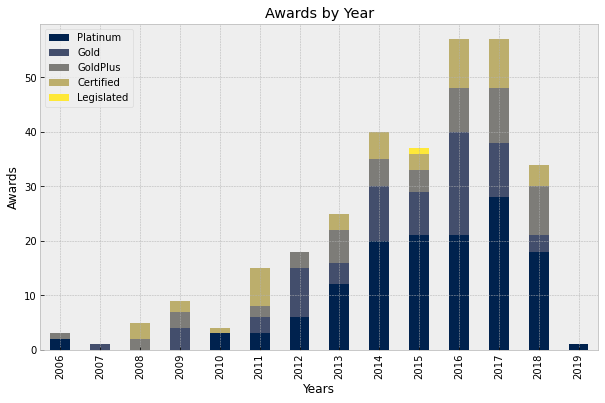

In [179]:
cleanedbuilding = pd.read_csv('cleansed_building.csv')

awards = ['Platinum', 'Gold', 'GoldPlus', 'Certified', 'Legislated']
years = [2018, 2017, 2015, 2009, 2016, 2014, 2013, 2012, 2010, 2008, 2011, 2007, 2006, 2019]
years.sort()
cleanedbuilding['greenmarkyearaward']

#row should be year, column should be rating
df = np.random.randn(len(years), len(awards))
df = pd.DataFrame(df, index=years)
df.columns = awards



for a in awards:
    for y in years:
        df.loc[y, a] = len((cleanedbuilding[cleanedbuilding['greenmarkrating'] == a])[cleanedbuilding['greenmarkyearaward'] == y])

# print(df)
df.plot(kind='bar',stacked=True, figsize=(10,6), xlabel=  'Years', ylabel = 'Awards', title = 'Awards by Year', legend = True, colormap = 'cividis')
plt.savefig('gms.jpg', format='jpg')



Percentage of buildings that are rated:
24.6
Percentage of buildings that are not rated:
75.4


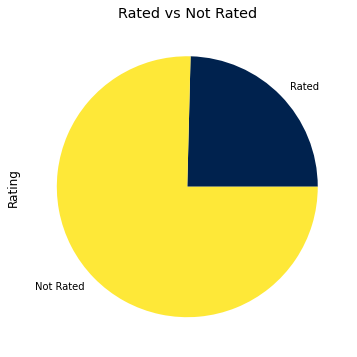

<Figure size 432x288 with 0 Axes>

In [180]:

df2 = np.empty(2)
df2 = pd.Series(df2, index = ('Rated', 'Not Rated'))

df2.loc['Not Rated'] = len(cleanedbuilding[cleanedbuilding['greenmarkrating'] == 'Not Rated'])
df2.loc['Rated'] = len(cleanedbuilding[cleanedbuilding['greenmarkrating'] != 'Not Rated'])

df2.plot(kind='pie',stacked=True, figsize=(10,6), ylabel=  'Rating', title = 'Rated vs Not Rated', colormap = 'cividis')
print('Percentage of buildings that are rated:')
print((df2['Rated'] / (df2['Rated'] + df2['Not Rated']) * 100).round(2))
print('Percentage of buildings that are not rated:')
print((df2['Not Rated'] / (df2['Rated'] + df2['Not Rated']) * 100).round(2))
plt.show()
plt.savefig('pie.jpg', format='jpg')

In [181]:
lrdf = pd.DataFrame(df.sum(axis = 1))
lrdf['Year'] = df.index
lrdf.columns = ['Awards', 'Year']
lrdf['Cumulative_Values'] = lrdf['Awards'].cumsum()
lrdf['Awards'] = lrdf['Cumulative_Values'].apply(lambda x: x/(df2['Rated'] + df2['Not Rated']))


In [182]:
lrdf
#remove 2019 as it is incomplete/anomaly
# lrdf.drop(lrdf.tail(1).index,inplace=True)

Awards  Year  Cumulative_Values
2006  0.002412  2006                3.0
2007  0.003215  2007                4.0
2008  0.007235  2008                9.0
2009  0.014469  2009               18.0
2010  0.017685  2010               22.0
2011  0.029743  2011               37.0
2012  0.044212  2012               55.0
2013  0.064309  2013               80.0
2014  0.096463  2014              120.0
2015  0.126206  2015              157.0
2016  0.172026  2016              214.0
2017  0.217846  2017              271.0
2018  0.245177  2018              305.0
2019  0.245981  2019              306.0

In [183]:
X = lrdf['Year'].astype(float)
X = sm.add_constant(X)
y = lrdf['Awards']
model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Awards   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           2.23e-07
Time:                        18:13:02   Log-Likelihood:                 30.107
No. Observations:                  14   AIC:                            -56.21
Df Residuals:                      12   BIC:                            -54.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.3220      4.060    -10.424      0.0

c:\Users\cairu\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [184]:
future_years = pd.DataFrame({'Year': [2019 + i for i in range(1, 12)]})
future_years = sm.add_constant(future_years)

predictions = model.predict(future_years)

predictions = pd.DataFrame(predictions)
predictions.index = future_years['Year']
predictions.columns = ['Awards']
print(predictions)

        Awards
Year          
2020  0.249991
2021  0.271066
2022  0.292142
2023  0.313217
2024  0.334292
2025  0.355367
2026  0.376443
2027  0.397518
2028  0.418593
2029  0.439668
2030  0.460743


In [185]:
merged_df = pd.merge(lrdf, predictions, on='Awards', how='outer')
merged_df = merged_df.fillna(0)
merged_df['Year'] = np.arange(2006,2006 + len(merged_df),1)
merged_df

Awards  Year  Cumulative_Values
0   0.002412  2006                3.0
1   0.003215  2007                4.0
2   0.007235  2008                9.0
3   0.014469  2009               18.0
4   0.017685  2010               22.0
5   0.029743  2011               37.0
6   0.044212  2012               55.0
7   0.064309  2013               80.0
8   0.096463  2014              120.0
9   0.126206  2015              157.0
10  0.172026  2016              214.0
11  0.217846  2017              271.0
12  0.245177  2018              305.0
13  0.245981  2019              306.0
14  0.249991  2020                0.0
15  0.271066  2021                0.0
16  0.292142  2022                0.0
17  0.313217  2023                0.0
18  0.334292  2024                0.0
19  0.355367  2025                0.0
20  0.376443  2026                0.0
21  0.397518  2027                0.0
22  0.418593  2028                0.0
23  0.439668  2029                0.0
24  0.460743  2030                0.0

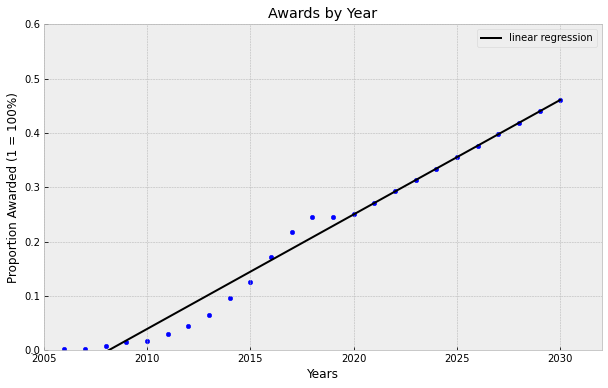

In [186]:
merged_df.plot(kind = 'scatter' , x = 'Year', y = 'Awards', figsize=(10,6), xlabel=  'Years', ylabel = 'Proportion Awarded (1 = 100%)', title = 'Awards by Year', colormap = 'cividis')
# Add regression line
fit = np.polyfit(merged_df.Year, merged_df.Awards, 1)
fit_fn = np.poly1d(fit)
plt.plot(merged_df.Year, fit_fn(merged_df.Year), '-k', label='linear regression')

plt.legend()
plt.xlim(2005, 2032)
plt.ylim(0,0.6)
plt.grid(True, linestyle='--')
plt.savefig('regression.jpg', format='jpg')

In [187]:
countries = pd.read_csv('per-capita-energy-use.csv')
countries = countries.drop_duplicates()
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8961 entries, 0 to 8960
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               8961 non-null   object 
 1   Code                                 8796 non-null   object 
 2   Year                                 8961 non-null   int64  
 3   Energy consumption per capita (kWh)  8961 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 350.0+ KB


In [188]:
indexes = countries[countries['Code'].isnull()].index.tolist()
temporary = countries[countries['Code'].isnull()]
print(temporary['Entity'].unique())
replacements = ['NIG','EU','NA']

for r in replacements:
    for i in (temporary['Entity'].unique()):
        energy[energy['energy_products'] == i]
        countries[countries['Entity'] == i] = (countries[countries['Entity'] == i]).fillna(r)

temporary = countries[countries['Code'].isnull()]
print(temporary['Entity'].unique())
countries.columns = ['Country','Code','Year','Consumption']
countries[['Code',"Country"]] = countries[['Code',"Country"]].astype('category')

countries.to_csv('cleanedpercapita.csv', index = False)

['Africa' 'Europe' 'North America']
[]


C:\Users\cairu\AppData\Local\Temp\ipykernel_3416\3248659117.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.loc[y, c] = (cleancountry[cleancountry['Country'] == c])[cleancountry['Year'] == y]['Consumption'].sum()


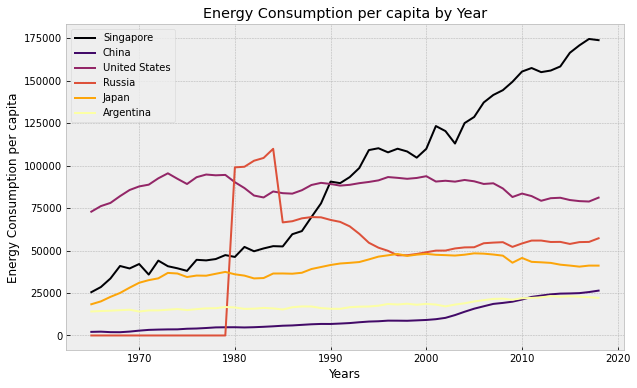

In [189]:
#compare singapore energy consumption to other countries
cleancountry = pd.read_csv('cleanedpercapita.csv')
years = np.arange(1965,2019)
mycountries = ['Singapore','China', 'United States', 'Russia', 'Japan', 'Argentina']

#row should be year, column should be countries
df = np.random.randn(len(years), len(mycountries))
df = pd.DataFrame(df, index=years)
df.columns = mycountries

for c in mycountries:
    for y in years:
        df.loc[y, c] = (cleancountry[cleancountry['Country'] == c])[cleancountry['Year'] == y]['Consumption'].sum()
        
modeldata = df

In [192]:
X = modeldata.drop('Russia', axis = 1)
y = modeldata['Russia']
X_predicter = X.head(15)
X = X.tail(39)
y_predicter = y.head(15)
y = y.tail(39)


In [252]:
X.describe()

Singapore         China  United States         Japan     Argentina
count      39.000000     39.000000      39.000000     39.000000     39.000000
mean   111728.020774  12830.235878   86858.582126  42758.888604  18847.357340
std     40104.257923   7483.139643    4684.740357   4541.052393   2624.632793
min     46256.735112   4724.738118   78894.409656  33611.157021  15304.957040
25%     83759.362604   6784.476012   82258.448581  40436.153185  16640.398762
50%    109994.521631   8893.212902   88631.869113  42855.563500  18203.750345
75%    146941.613937  19539.264909   90636.804772  47143.053260  21597.898404
max    174633.546718  26416.954770   93810.545588  48373.422308  23202.432061

In [253]:
y.describe()

count        39.000000
mean      62393.924057
std       17182.292420
min       47223.328185
25%       51920.743655
50%       55059.972192
75%       67093.967710
max      109935.292774
Name: Russia, dtype: float64

In [193]:
# param_grid = {'n_estimators': np.arange(100, 1500, 100),
#               'max_depth': [2, 3, 4, 5, 6, 7, 8],
#               'min_samples_leaf': [1, 2, 4],
#               'learning_rate': [0.1, 0.05, 0.01]}

# # perform grid search
# grid_search = model_selection.GridSearchCV(regressor, param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

Mean Squared Error: 4095627.50565905
[52584.01124001 52619.66345237 54587.07950062 56226.981113
 56226.981113   56375.01173805 56226.981113   56226.981113  ]


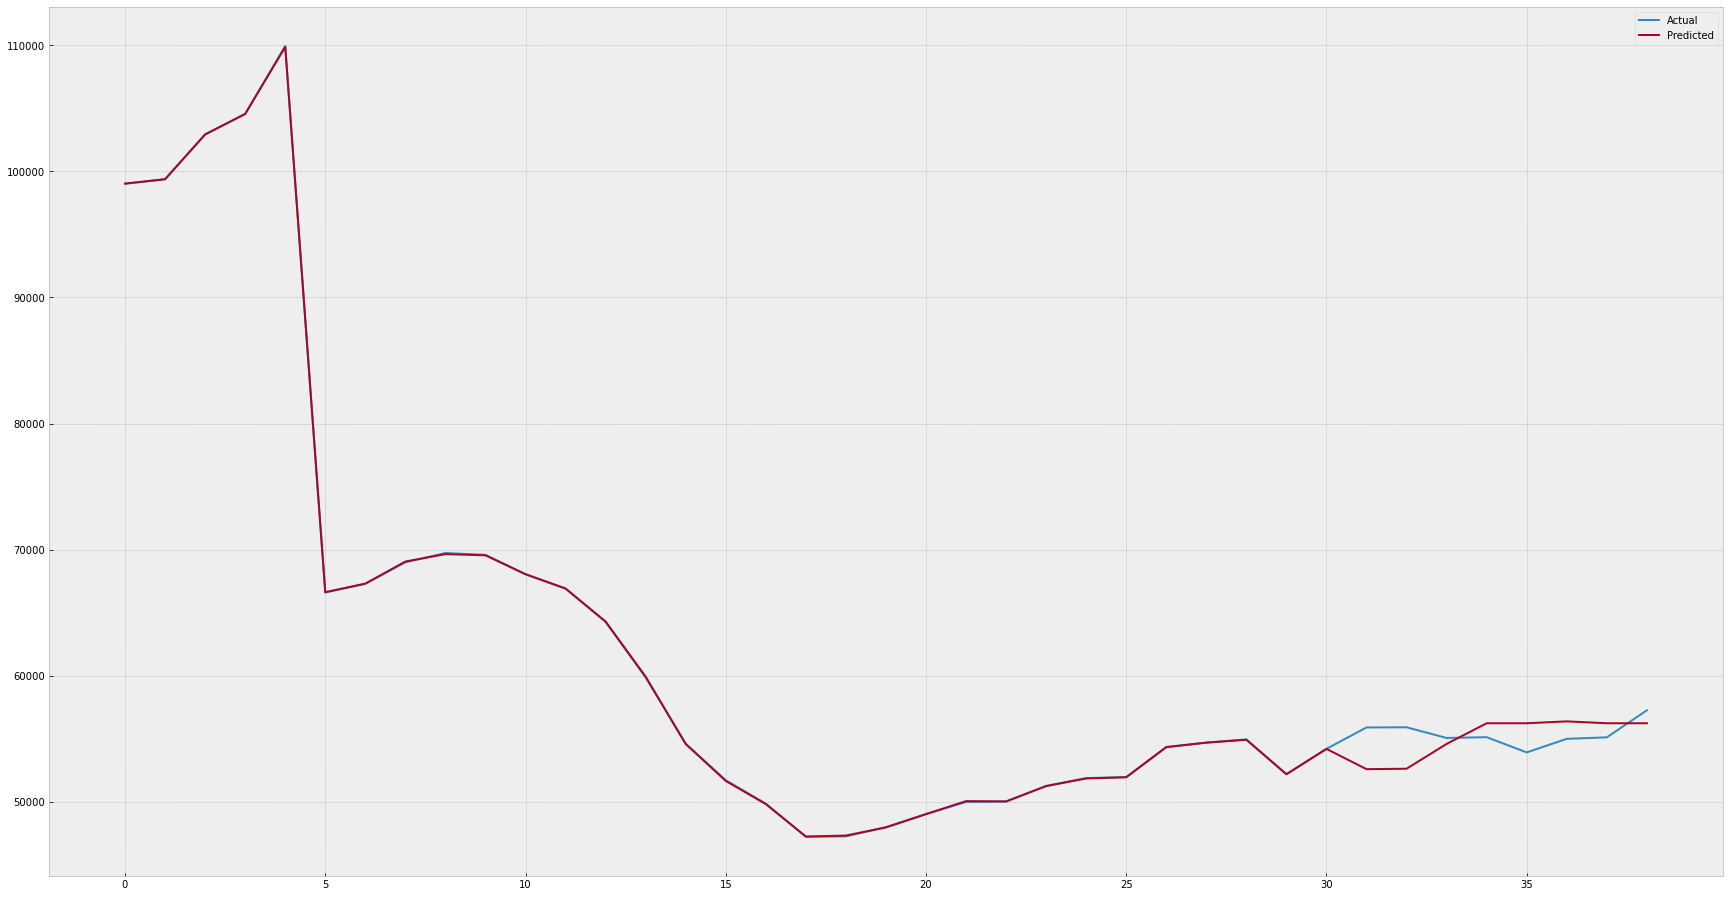

In [240]:
predictions = gradboostregmodel(X, y, 0.05, 2,1,500,0,X_predicter)

In [249]:
predicted = list(predictions) + list(y.values)
modeldata['Russia'] = predicted

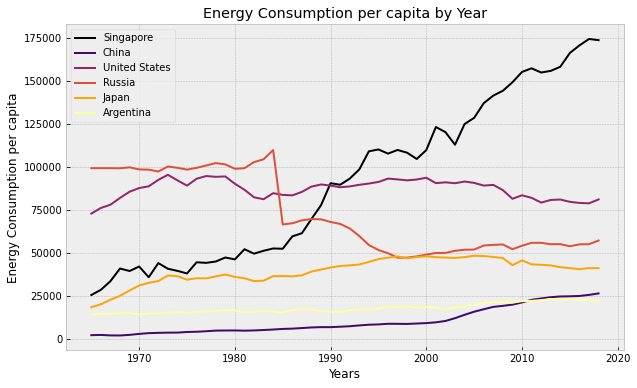

In [251]:
modeldata.plot(kind = 'line', figsize=(10,6), xlabel=  'Years', ylabel = 'Energy Consumption per capita', title = 'Energy Consumption per capita by Year', legend = True, colormap = 'inferno') 
plt.savefig('graph.jpg', format='jpg')

In [ ]:
#decisiontree 9812653 
# random forest Mean Squared Error: 11940809.039206313 n 100 
# random forest Mean Squared Error: 10448818.705831926 n 10000 
# gradientboostingregressor Mean Squared Error: 6459028.949743659


In [ ]:
df = df.tail(39)
#only use 1980 to 2018 as russia has no data for 1965 to 1979
sum_sq = df.iloc[:, 1:].pow(2).sum()

mean_sq = df.iloc[:, 1:].pow(2).mean()  

print('sum_sq:\n',sum_sq, '\nmean_sq:\n',mean_sq)
print()
# print(sum(sum_sq)/sum(mean_sq))
#cannot calculate r^2, i am unable to calculate prdeicted vlaues

sum_sq:
 China            8.547884e+09
United States    2.950661e+11
Russia           1.630459e+11
Japan            7.208818e+10
Argentina        1.411546e+10
dtype: float64 
mean_sq:
 China            2.191765e+08
United States    7.565797e+09
Russia           4.180663e+09
Japan            1.848415e+09
Argentina        3.619349e+08
dtype: float64



In [ ]:
degreesoffreedom = len(mycountries) - 1

results = stats.f_oneway(df['Singapore'], df['China'], df['United States'], df['Russia'], df['Japan'], df['Argentina'])

print('d.f:',degreesoffreedom,'\nF value:',results.statistic, '\nP value:', results.pvalue)


d.f: 5 
F value: 175.12907308582427 
P value: 5.515049178055074e-76


In [ ]:
variancearray = {}

def variance(data):
     n = len(data)
     mean = sum(data) / n
     deviations = [(x - (sum(data) / n)) ** 2 for x in data]
     variance = sum(deviations) / n
     return variance


for c in mycountries:
    variancearray[c] = variance(df[c])

#to test for equal variance max/min < 2
print('max/min = ' + str(max(variancearray.values()) / min(variancearray.values())))

max/min = 233.47687288400343


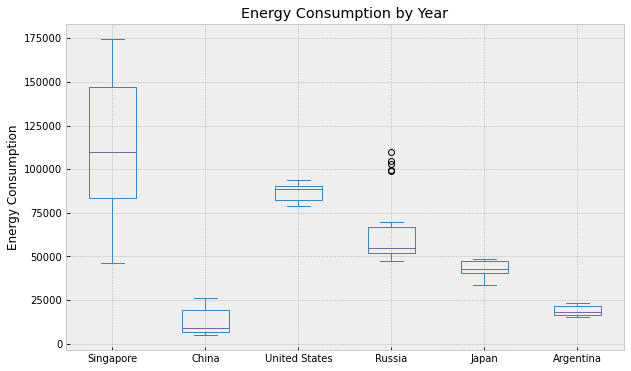

In [ ]:
df.plot(kind = 'box', figsize=(10,6), xlabel=  'Years', ylabel = 'Energy Consumption', title = 'Energy Consumption by Year', legend = True)
plt.savefig('anova.jpg', format='jpg')

In [ ]:
# #funny haha graph
# cleancountry = pd.read_csv('cleanedpercapita.csv')
# years = np.arange(1965,2019)
# mycountries = cleancountry['Country'].unique()

# #row should be year, column should be countries
# df = np.random.randn(len(years), len(mycountries))
# df = pd.DataFrame(df, index=years)
# df.columns = mycountries

# for c in mycountries:
#     for y in years:
#         df.loc[y, c] = (cleancountry[cleancountry['Country'] == c])[cleancountry['Year'] == y]['Consumption'].sum()





In [ ]:
# #the funyn haha thing is that the countries with the highest energy consumption are the ones with the highest population
# df.plot(kind = 'line', figsize=(10,6), logy = True, xlabel=  'Years', ylabel = 'Energy Consumption', title = 'Energy Consumption by Year') 

In [ ]:
coolhtml = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_electricity_consumption')[0]
coolhtml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   (Rank, Rank)                                                                    219 non-null    object 
 1   (Country/Region, Country/Region)                                                219 non-null    object 
 2   (Total electricityconsumption(GW·h/yr), Total electricityconsumption(GW·h/yr))  219 non-null    object 
 3   (Year of data, Year of data)                                                    219 non-null    object 
 4   (Source, Source)                                                                219 non-null    object 
 5   (Population, Population)                                                        219 non-null    object 
 6   (As of, As of)     

In [ ]:

coolhtml.columns = ['Rank', 'Country', 'Consumption', 'Year', 'Source', 'Population', 'As of', 'kWh/year','Watts']
coolhtml = coolhtml.drop(columns = ['Year','Source','As of'])
coolhtml.columns = ['Rank', 'Country', 'Consumption','Population', 'kWh/year','Watts']
coolhtml.head(10)


Rank        Country Consumption  Population  kWh/year   Watts
0    —          World    23398000  7800000000    3081.0   350.0
1    1          China     8312800  1412600000    5885.0   671.0
2    2  United States     3989566   328200000   12154.0  1387.0
3    3          India     1248086  1384660000    1255.0   107.0
4    4         Russia      965156   146700000    6685.0   763.0
5    5          Japan      902842   126860000    7150.0   816.0
6    6         Brazil      597234   210000000    2830.0   323.0
7    7         Canada      549263    37534000   14612.0  1667.0
8    8   Korea, South      527035    51710000   10192.0  1163.0
9    9        Germany      524268    83695430    6306.0   719.0

In [ ]:
#since the data doesnt seem to contain null values, i will just drop the duplicates and go with the normal html cleaning process
coolhtml = coolhtml.drop_duplicates()
df_obj = coolhtml.select_dtypes(['object'])
coolhtml[df_obj.columns] = df_obj.apply(lambda x: x.str.strip()) #function


coolhtml.to_csv('cleanedhtml.csv', index = False)


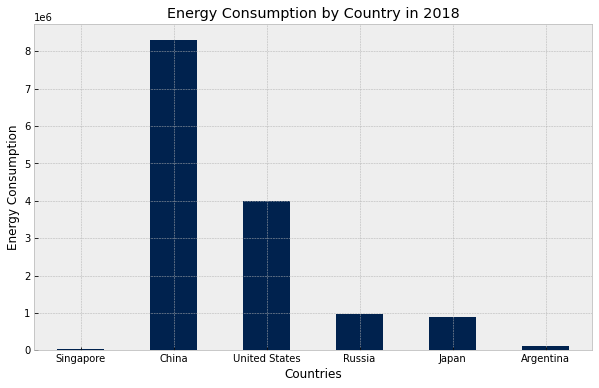

In [ ]:
html = pd.read_csv('cleanedhtml.csv')
mycountries = ['Singapore','China', 'United States', 'Russia', 'Japan', 'Argentina']

srs = np.random.randn(len(mycountries))
srs = pd.Series(srs, index = mycountries)

for c in mycountries:
    srs[c] = (html[html['Country'] == c])['Consumption'].sum()

srs = srs.astype('float')
srs.plot(kind = 'bar', figsize=(10,6), xlabel=  'Countries', ylabel = 'Energy Consumption', title = 'Energy Consumption by Country in 2018', colormap = 'cividis')
plt.xticks(rotation=0)
plt.savefig('htmlgraph.jpg', format='jpg')

In [ ]:
#(https://data.gov.sg/dataset/total-final-energy-consumption-2018)
energy = pd.read_csv('undirtied_total-final-energy.csv')
energy.head(10)

_id  consumption_ktoe     energy_products                         sector  \
0    1               0.0       Coal and Peat  Commerce and Services-related   
1    2               0.0           Crude Oil  Commerce and Services-related   
2    3            1272.6         Electricity  Commerce and Services-related   
3    4              72.9         Natural Gas  Commerce and Services-related   
4    5               0.0              Others  Commerce and Services-related   
5    6              78.5  Petroleum Products  Commerce and Services-related   
6    7               0.0       Coal and Peat                     Households   
7    8               0.0           Crude Oil                     Households   
8    9             552.9         Electricity                     Households   
9   10              54.0         Natural Gas                     Households   

   year  
0  2009  
1  2009  
2  2009  
3  2009  
4  2009  
5  2009  
6  2009  
7  2009  
8  2009  
9  2009